## CNN BASELINE MODEL

## 20 epoch


In [1]:
import os 
os.environ["CUDA_VISIBLE_DEVICES"]="0,1"

In [15]:
## import json

import numpy as np
import pandas as pd
import keras
import keras.backend as K
import time
from keras.optimizers import SGD
from keras.callbacks import Callback
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

### 1.Loading 224*224 dataset

In [3]:
from time import time
import numpy as np

start_time = time()

X_train = np.load('/home/zxt/data/final_22/224/2k/X_train.npy')
X_validate = np.load('/home/zxt/data/final_22/224/2k/X_validate.npy')


X_test = np.load('/home/zxt/data/final_22/224/2k/X_test.npy')

print('Loading labels...')
Y_train = np.load('/home/zxt/data/final_22/224/2k/Y_train.npy')
Y_validate = np.load('/home/zxt/data/final_22/224/2k/Y_validate.npy')
Y_test = np.load('/home/zxt/data/final_22/224/2k/Y_test.npy')

end_time = time()
print('Running time: %s seconds'%(end_time - start_time))

Loading labels...
Running time: 381.9038007259369 seconds


In [4]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_validate.shape[0], 'validate samples')
print(X_test.shape[0], 'test samples')

X_train shape: (35200, 224, 224, 3)
35200 train samples
4400 validate samples
4400 test samples


In [5]:
# Convert the images to float and scale it to a range of 0 to 1
# x_train = X_train.astype('float32')
# x_validate = X_validate.astype('float32')
# x_test = X_test.astype('float32')

X_train /=255.
X_validate /=  255.
X_test /= 255.

In [6]:
# Y_train label
for i in Y_train:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='empty':
        i[0]=21
        
for i in Y_validate:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='empty':
        i[0]=21

for i in Y_test:
    if i[0]=='elephant':
        i[0]=0
    if i[0]=='wild_boar':
        i[0]=1
    if i[0]=='gazellethomosons':
        i[0]=2
    if i[0]=='squirrel':
        i[0]=3 
    if i[0]=='hedgehog':
        i[0]=4
    if i[0]=='guineafowl':
        i[0]=5
    if i[0]=='moose':
        i[0]=6
    if i[0]=='coyote':
        i[0]=7   
    if i[0]=='bird':
        i[0]=8
    if i[0]=='fox':
        i[0]=9
    if i[0]=='giraffe':
        i[0]=10
    if i[0]=='buffalo':
        i[0]=11
    if i[0]=='hare':
        i[0]=12
    if i[0]=='vehicle':
        i[0]=13
    if i[0]=='wildebeest':
        i[0]=14
    if i[0]=='cattle':
        i[0]=15 
    if i[0]=='skunk':
        i[0]=16
    if i[0]=='lion':
        i[0]=17
    if i[0]=='zebra':
        i[0]=18
    if i[0]=='black_bear':
        i[0]=19
    if i[0]=='racoon':
        i[0]=20
    if i[0]=='empty':
        i[0]=21

In [7]:
from keras.utils import np_utils
y_train=np_utils.to_categorical(Y_train,22)
y_valid=np_utils.to_categorical(Y_validate,22)
y_test=np_utils.to_categorical(Y_test,22)

In [8]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

### 2. Training the Model¶

In [20]:
num_train_samples = len(Y_train)
num_val_samples = len(Y_validate)
batch_size = 128
epochs = 30
num_classes = 22
input_shape = 224,224,3


learning_rate = 0.01
decay_rate = learning_rate / epochs
momentum = 0.8
sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

# prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [21]:
K.clear_session()
model = None

In [22]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(22))
model.add(Activation('softmax'))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 222, 222, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 111, 111, 64)     

In [24]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=sgd,
    metrics=['accuracy']
)

hist = model.fit(
    X_train, 
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=[early_stopping],
    validation_data=(X_validate, y_valid)
)

Train on 35200 samples, validate on 4400 samples
Epoch 1/20
35200/35200 [==============================] - 299s 8ms/step - loss: 2.1476 - accuracy: 0.2997 - val_loss: 1.6707 - val_accuracy: 0.4809
Epoch 2/20
35200/35200 [==============================] - 299s 8ms/step - loss: 1.5021 - accuracy: 0.4827 - val_loss: 1.2869 - val_accuracy: 0.5805
Epoch 3/20
35200/35200 [==============================] - 299s 8ms/step - loss: 1.2344 - accuracy: 0.5718 - val_loss: 1.1235 - val_accuracy: 0.6195
Epoch 4/20
35200/35200 [==============================] - 299s 9ms/step - loss: 1.0480 - accuracy: 0.6329 - val_loss: 1.0308 - val_accuracy: 0.6543
Epoch 5/20
35200/35200 [==============================] - 299s 8ms/step - loss: 0.9047 - accuracy: 0.6836 - val_loss: 0.9596 - val_accuracy: 0.6711
Epoch 6/20
35200/35200 [==============================] - 299s 8ms/step - loss: 0.7895 - accuracy: 0.7223 - val_loss: 0.9316 - val_accuracy: 0.6989
Epoch 7/20
35200/35200 [==============================] - 299s 

In [ ]:
# start_time = time()
# print('Training model...')


# hist = model.fit(
#     X_train, 
#     y_train,
#     batch_size=batch_size,
#     epochs=epochs,
#     callbacks=[early_stopping,f1_metrics],
#     validation_data = (X_validate,y_validate))

# end_time = time()
# print('Running time: %s seconds'%(end_time - start_time))

### 3.

In [21]:
model.save('/home/zxt/data/model/cnn_baseline_5k_32_128batchsize100epoch.h5')

### 4. Evaluation

In [26]:
history_df = pd.DataFrame(hist.history)
# history_df['val_f1'] = f1_metrics.val_f1s
# history_df['val_precision'] = f1_metrics.val_precisions
# history_df['val_recall'] = f1_metrics.val_recalls

# history_df[['loss', 'val_loss']].plot()
# history_df[['acc', 'val_acc']].plot()
# history_df[['val_f1', 'val_precision', 'val_recall']].plot()

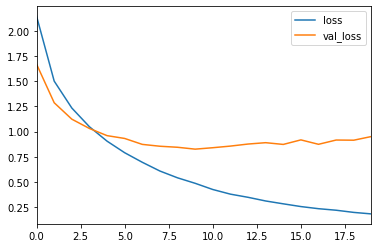

In [28]:
history_df[['loss', 'val_loss']].plot()

In [30]:
# history_df[['val_f1', 'val_precision', 'val_recall']].plot()

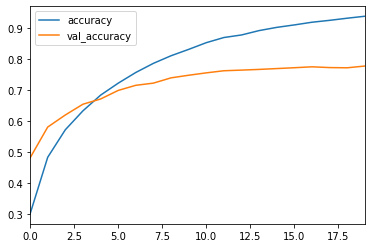

In [31]:
history_df[['accuracy', 'val_accuracy']].plot()

### 5. Prediction

In [32]:
loss,accuracy = model.evaluate(X_test,y_test,)
print('\ntest loss',loss)
print('accuracy',accuracy)

4400/4400 [==============================] - 16s 4ms/step

test loss 0.9090645166418769
accuracy 0.7897727489471436
